In [2]:
""""import tweepy
import csv #Import csv
auth = tweepy.auth.OAuthHandler('xxxxxxxxx', 'xxxxxxxxxxxx')
auth.set_access_token('xxxxxxxxxx', 'xxxxxxxxxxxx')

api = tweepy.API(auth,wait_on_rate_limit=True)

# Open/create a file to append data to
csvFile = open('dataset.csv', 'a',encoding="utf-8",newline='')

#Use csv writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,count=100000,
                           q = "Covid-19",re.sub('[^a-zA-Z]', '',clean )
                           tweet_mode='extended',
                           lang = "en").items():

    # Write a row to the CSV file. I use encode UTF-8
    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])
    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)
csvFile.close()"""

'"import tweepy\nimport csv #Import csv\nauth = tweepy.auth.OAuthHandler(\'xxxxxxxxx\', \'xxxxxxxxxxxx\')\nauth.set_access_token(\'xxxxxxxxxx\', \'xxxxxxxxxxxx\')\n\napi = tweepy.API(auth,wait_on_rate_limit=True)\n\n# Open/create a file to append data to\ncsvFile = open(\'dataset.csv\', \'a\',encoding="utf-8",newline=\'\')\n\n#Use csv writer\ncsvWriter = csv.writer(csvFile)\n\nfor tweet in tweepy.Cursor(api.search,count=100000,\n                           q = "Covid-19",re.sub(\'[^a-zA-Z]\', \'\',clean )\n                           tweet_mode=\'extended\',\n                           lang = "en").items():\n\n    # Write a row to the CSV file. I use encode UTF-8\n    csvWriter.writerow([tweet.full_text,tweet.user.screen_name,tweet.user.location])\n    print(tweet.full_text,tweet.user.screen_name,tweet.user.location)\ncsvFile.close()'

In [61]:
# creating a dataframe
import pandas as pd
file_name='dataset.csv'
data = pd.read_csv(file_name, sep = ',',names = ['text','username','location'])
data.shape

(131563, 3)

In [62]:
data.head()

,text,username,location
0,RT @tsum_africa: In response to the current #C...,PaulABarter,Singapore
1,RT @FemAdesina: No presidential broadcast on C...,Abdulazizmento2,port Harcourt
2,Covid-19 Outbreak in Nigeria Is Just One of Af...,Ricardo_Gardel,"Tinton Falls, NJ"
3,RT @ChangeOrg_India: Walking miles without foo...,ahumanenough,NaN
4,RT @GhulamABilour: I have been tested positive...,tormakhay_s,"Sexi, Peru"


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131563 entries, 0 to 131562
Data columns (total 3 columns):
text        131563 non-null object
username    131563 non-null object
location    92721 non-null object
dtypes: object(3)
memory usage: 1.5+ MB


In [64]:
data=data[(data['location'].notnull())]                      #dropping empty row
data = data.sample(frac=1).reset_index(drop=True)           #resetting index
data['len']=data["text"].str.len()                          #removing clipped tweets
df1= data[(data['len'] <=137)]
df2=data[(data['len'] >=150)]
data=pd.concat([df1,df2])                              
data = data.sample(frac=1).reset_index(drop=True)       #resetting index      

In [65]:
data.shape

(35482, 4)

In [66]:
data.head()

,text,username,location,len
0,RT @DilanTheVillain: i can hear the DJs now “i...,niaabiaah,HTX,93
1,#HTNewsBrief | Here's a look at everything tha...,htTweets,India,100
2,Markets rally as Fed's Powell pledges more amm...,JuliaKollewe,London,199
3,Top story: Drugs &amp; Pharma Cos News @EUdaii...,ironorehopper,Padova,282
4,After the intolerable weight of global expecta...,Musvo1,"London, England",274


In [67]:
#cleaning the tweets
import numpy as np
import re
def remove_pattern(input_txt, pattern):                                           #function to remove pattern 
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(lst):
    lst = np.vectorize(remove_pattern)(lst, "\r")                                  
    lst = np.vectorize(remove_pattern)(lst, "\n")
    lst = np.vectorize(remove_pattern)(lst, "RT @[\w]*:")                         # removing RT @x from tweets:
    lst = np.vectorize(remove_pattern)(lst, "@[\w]*")                             # removing  @xxx from tweets 
    lst = np.vectorize(remove_pattern)(lst, "https?://[A-Za-z0-9./]*")            # reremoving URL links http://xxx
    return lst

In [68]:
data['clean']= clean_tweets(data['text'])   #Cleaned Tweets are kept in separate coloumn

In [69]:
# remove special characters, numbers, punctuations (except for #)

data['clean'] = data['clean'].str.replace("[^a-zA-Z# ]", "")

In [70]:
# removing stopwords, coverting into lowercase and applying wordnet lemmatizer

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
from nltk.corpus import stopwords
cleaned_tweets = []
for index, row in data.iterrows():            
    words_without_stopwords = [wl.lemmatize(word.lower()) for word in row.clean.split() if not word in set(stopwords.words('english')) and '#' not in word.lower()]
    cleaned_tweets.append(' '.join(words_without_stopwords))
data['cleaned_tweets'] = cleaned_tweets
data.head(10)

[nltk_data] Downloading package wordnet to C:\Users\Ishika
[nltk_data]     Singhal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,text,username,location,len,clean,cleaned_tweets
0,RT @DilanTheVillain: i can hear the DJs now “i...,niaabiaah,HTX,93,i can hear the DJs now if you survived COVID ...,hear dj survived covid make mfn noise
1,#HTNewsBrief | Here's a look at everything tha...,htTweets,India,100,#HTNewsBrief Heres a look at everything thats...,here look everything thats making news hour
2,Markets rally as Fed's Powell pledges more amm...,JuliaKollewe,London,199,Markets rally as Feds Powell pledges more ammu...,market rally fed powell pledge ammunition figh...
3,Top story: Drugs &amp; Pharma Cos News @EUdaii...,ironorehopper,Padova,282,Top story Drugs amp Pharma Cos News Patient C...,top story drug amp pharma co news patient cent...
4,After the intolerable weight of global expecta...,Musvo1,"London, England",274,After the intolerable weight of global expecta...,after intolerable weight global expectation ch...
5,@PennyHandful @rozhubley Anyone mentally compe...,BStardAlan,Rising Star of the New Right,256,Anyone mentally competent already has access...,anyone mentally competent already access medic...
6,@Kenyans As the Nairobi sen. It's very wrong f...,Mitchez09,luton,169,As the Nairobi sen Its very wrong for some Ke...,a nairobi sen it wrong kenyan evicted middle c...
7,Poll: Are contingency plans for a general elec...,Sinn8th,Dhun na ngall wash ur hands,122,Poll Are contingency plans for a general elect...,poll are contingency plan general election cov...
8,COVID-19 crisis: production time decrease in N...,Contiweb_Global,The Netherlands,235,COVID crisis production time decrease in North...,covid crisis production time decrease north am...
9,@tinapperez Safety protocol officers patrol th...,gmanews,Philippines,188,Safety protocol officers patrol this mall to ...,safety protocol officer patrol mall remind mal...


In [71]:
# creating an analyzer function

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(text):
    score = analyser.polarity_scores(text)
    if score['compound'] >= 0.05 :                                    # positive tweet
        return 2
    elif (score['compound'] > -0.05) and (score['compound'] < 0.05) : # neutral tweet
        return 1 
    else :                                                            # negative tweet
        return 0

In [72]:
# each tweet is labelled based on the compound score

sentiments_using_vader = data.cleaned_tweets.apply(lambda text: sentiment_analyzer_scores(text))     
pd.DataFrame(sentiments_using_vader.value_counts())

,cleaned_tweets
2,15733
0,10541
1,9208


In [73]:
data['sentiment'] = sentiments_using_vader
data.head()

,text,username,location,len,clean,cleaned_tweets,sentiment
0,RT @DilanTheVillain: i can hear the DJs now “i...,niaabiaah,HTX,93,i can hear the DJs now if you survived COVID ...,hear dj survived covid make mfn noise,2
1,#HTNewsBrief | Here's a look at everything tha...,htTweets,India,100,#HTNewsBrief Heres a look at everything thats...,here look everything thats making news hour,1
2,Markets rally as Fed's Powell pledges more amm...,JuliaKollewe,London,199,Markets rally as Feds Powell pledges more ammu...,market rally fed powell pledge ammunition figh...,0
3,Top story: Drugs &amp; Pharma Cos News @EUdaii...,ironorehopper,Padova,282,Top story Drugs amp Pharma Cos News Patient C...,top story drug amp pharma co news patient cent...,0
4,After the intolerable weight of global expecta...,Musvo1,"London, England",274,After the intolerable weight of global expecta...,after intolerable weight global expectation ch...,2


In [74]:
data.describe()

,len,sentiment
count,35482.000000,35482.000000
mean,162.006961,1.146328
std,77.083169,0.847996
min,8.000000,0.000000
25%,98.000000,0.000000
50%,129.000000,1.000000
75%,233.000000,2.000000
max,832.000000,2.000000


[]

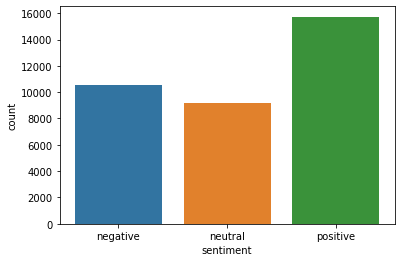

In [75]:
# craeting a bar plot of sentiments

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
sent_counts = pd.DataFrame.from_dict(Counter(data['sentiment']), orient = 'index').reset_index()
sent_counts.columns = ['sentiment', 'count']
sns.barplot(y="count", x='sentiment', data=sent_counts)
positions = (0, 1, 2)
labels = ("negative", "neutral", "positive")
plt.xticks(positions, labels)
plt.plot()

In [76]:
#wordcloud generating function

from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
import urllib
import requests
def generate_wordcloud(all_words):
    Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))
    image_colors = ImageColorGenerator(Mask)
    wc = WordCloud(background_color='black', height=750, width=2000,mask=Mask).generate(all_words)
    plt.figure(figsize=(10,20))
    plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")
    plt.axis('off')
    plt.show()

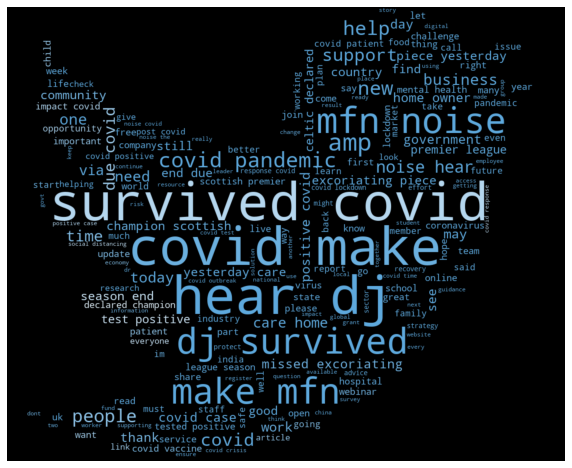

In [77]:
# wordcloud for positive tweets

all_words = ' '.join([text for text in data['cleaned_tweets'][data.sentiment == 2]])
generate_wordcloud(all_words)

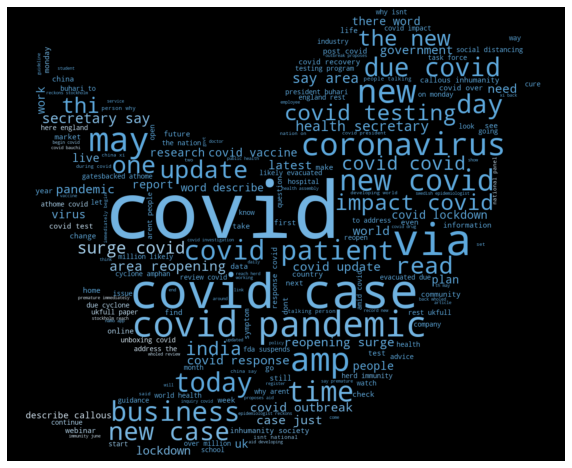

In [78]:
# wordcloud for neutral tweets

all_words = ' '.join([text for text in data['cleaned_tweets'][data.sentiment == 1]])
generate_wordcloud(all_words)

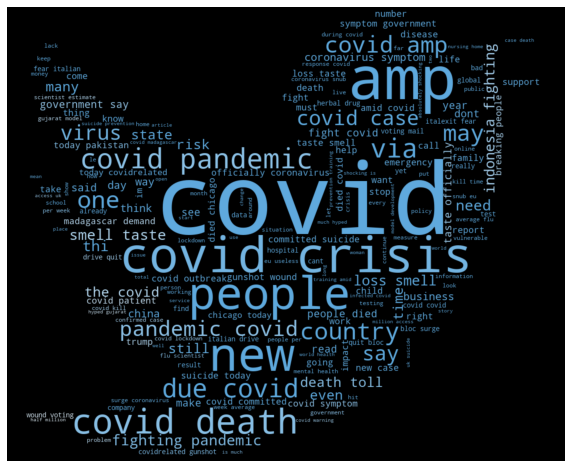

In [79]:
# wordcloud for negative tweets

all_words = ' '.join([text for text in data['cleaned_tweets'][data.sentiment == 0]])
generate_wordcloud(all_words)

In [80]:
# creating a hashtag frequency distribution
import nltk

#function to collect hashtags
def hashtag_extract(text_list):
    hashtags = []
    # Loop over the words in the tweet
    for text in text_list:
        ht = re.findall(r"#(\w+)", text)
        hashtags.append(ht)

    return hashtags

def generate_hashtag_freqdist(hashtags):
    a = nltk.FreqDist(hashtags)
    d = pd.DataFrame({'Hashtag': list(a.keys()),
                      'Count': list(a.values())})
    # selecting top 15 most frequent hashtags     
    d = d.nlargest(columns="Count", n = 25)
    plt.figure(figsize=(16,7))
    ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
    plt.xticks(rotation=80)
    ax.set(ylabel = 'Count')
    plt.show()

In [81]:
hashtags = hashtag_extract(data['clean'])
hashtags = sum(hashtags, [])

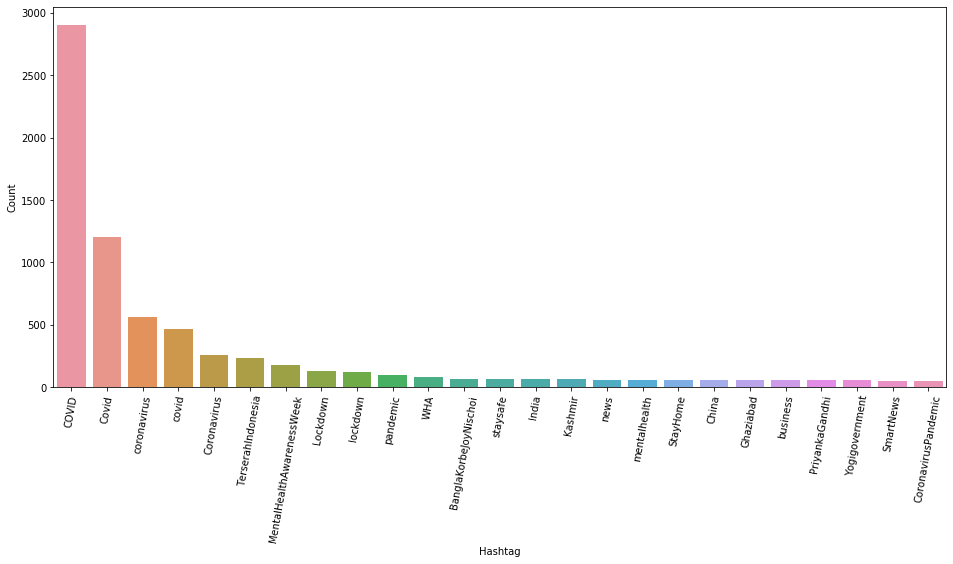

In [82]:
generate_hashtag_freqdist(hashtags)

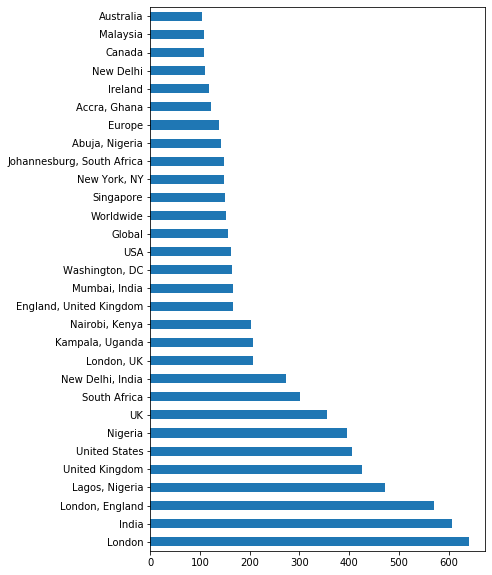

In [83]:
# bar graph for twitter location

data['location'].value_counts().head(30).plot(kind='barh', figsize=(6,10))

In [89]:
x = data.iloc[:,-2].values
y = data.iloc[:,-1].values

In [90]:
# creating tfid vectorizer model

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
x = tfidf_word_vectorizer.fit_transform(x)

In [91]:
# creating training set and test set from the features and output label

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [92]:
# creating and training a ML model

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [97]:
import pickle
Pkl_Filename = "model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(classifier, file)

In [99]:
data.to_csv('App.csv', index=False) 